In [7]:
import numpy as np
import pyNNGP
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
%matplotlib inline

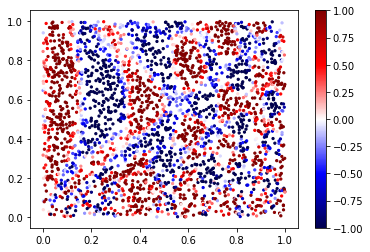

In [51]:
n = 3000
m = 2
np.random.seed(5)
coords = np.random.uniform(0, 1, size=(n, 2))
s = np.argsort(coords[:,0])
coords = coords[s]
def f(x, y):
    return np.sin(30*x*y)+np.sin(10*x/y)-np.sin(30*x**2)
w = f(coords[:,0], coords[:,1])
X = np.ones((n,1), dtype=float)
beta = np.array([0])
y = X.dot(beta) + w + np.random.normal(0, 0.25, size=n)

plt.scatter(
    coords[:,0], coords[:,1],
    c=y, s=5,
    vmin=-1, vmax=1, cmap='seismic'
)
plt.colorbar()
plt.show()

covModel = pyNNGP.SqExp(
    sigmaSq=0.5, 
    phi=5.0, phiUnifa=1.0, phiUnifb=50.0, phiTuning=1.0, 
    sigmaSqIGa=0.04, sigmaSqIGb=0.04
)

noiseModel = pyNNGP.ConstHomogeneousNoiseModel(0.01)
nngp = pyNNGP.SeqNNGP(
    y, X, coords,
    nNeighbors=3,
    covModel=covModel,
    noiseModel=noiseModel
)

# print(1./covModel.phi, np.sqrt(covModel.sigmaSq))
w_samples = []
beta_samples = []
for i in range(30):
    nngp.sample(10)
    w_samples.append(np.copy(nngp.w))
    beta_samples.append(np.copy(nngp.beta))
#     print(1./covModel.phi, np.sqrt(covModel.sigmaSq))

In [52]:
@interact(i=widgets.IntSlider(min=0, max=len(w_samples)-1, value=0))
def f(i):
    fig, axes = plt.subplots(ncols=3, figsize=(14, 3.5))
    i0 = axes[0].scatter(
        coords[:,0], coords[:,1], 
        c=w, s=5,
        vmin=-1, vmax=1, cmap='seismic'
    )    
    plt.colorbar(i0, ax=axes[0])
    i1 = axes[1].scatter(
        coords[:,0], coords[:,1],
        c=w_samples[i]+X.dot(beta_samples[i]), s=5,
        vmin=-1, vmax=1, cmap='seismic'
    )    
    plt.colorbar(i1, ax=axes[1])
    i2 = axes[2].scatter(
        coords[:,0], coords[:,1],
        c=w_samples[i]+X.dot(beta_samples[i])-w, s=5,
        vmin=-0.4, vmax=0.4, cmap='seismic'
    )
    plt.colorbar(i2, ax=axes[2])
    plt.show()

interactive(children=(IntSlider(value=0, description='i', max=29), Output()), _dom_classes=('widget-interact',…